### Name : J S Anandatirtha
### Dept : CSE - A
### Roll : 170501011

#  DATA ANALYTICS ASSIGNMENT - I

#### Description of dataset

This dataset describes about the population of India as per 2011 csensus. It consists of information about Total population, Male, Female, Number of Literate corresponding to states. The details are described in state-wise as well as district-wise.

# Statistical information on quantitative variables 

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
import random
from collections import Counter

In [2]:
data = pd.read_csv('datasets_14903_19895_india-districts-census-2011.csv')
data.head(5)

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [3]:
# To check any null datas

data.isnull().sum()

District code                    0
State name                       0
District name                    0
Population                       0
Male                             0
                                ..
Power_Parity_Rs_330000_425000    0
Power_Parity_Rs_425000_545000    0
Power_Parity_Rs_330000_545000    0
Power_Parity_Above_Rs_545000     0
Total_Power_Parity               0
Length: 118, dtype: int64

In [4]:
data.shape

(640, 118)

In [5]:
# summary on entire dataset

data.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,...,786.046875,1696.456250,294.000000,215.300000,509.300000,194.204688,261.245313,455.450000,279.631250,3315.412500
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,...,1038.854733,1720.535151,638.345281,362.684243,968.538748,424.108001,587.279450,1007.364839,1050.934537,4638.568719
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,...,236.750000,589.000000,59.000000,24.750000,95.000000,19.000000,21.000000,44.000000,18.000000,1024.250000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,5.483525e+05,4.038590e+05,2.460160e+05,1.255485e+05,1.178550e+05,...,518.000000,1220.500000,149.000000,118.500000,278.000000,84.000000,85.500000,186.500000,60.500000,2238.500000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,9.188582e+05,6.641550e+05,4.477078e+05,2.284602e+05,2.140502e+05,...,941.250000,2233.250000,296.500000,262.000000,564.500000,213.250000,293.000000,497.000000,215.500000,3959.000000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,10334.000000,13819.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


# Graphical Representation  

Text(0, 0.5, 'State')

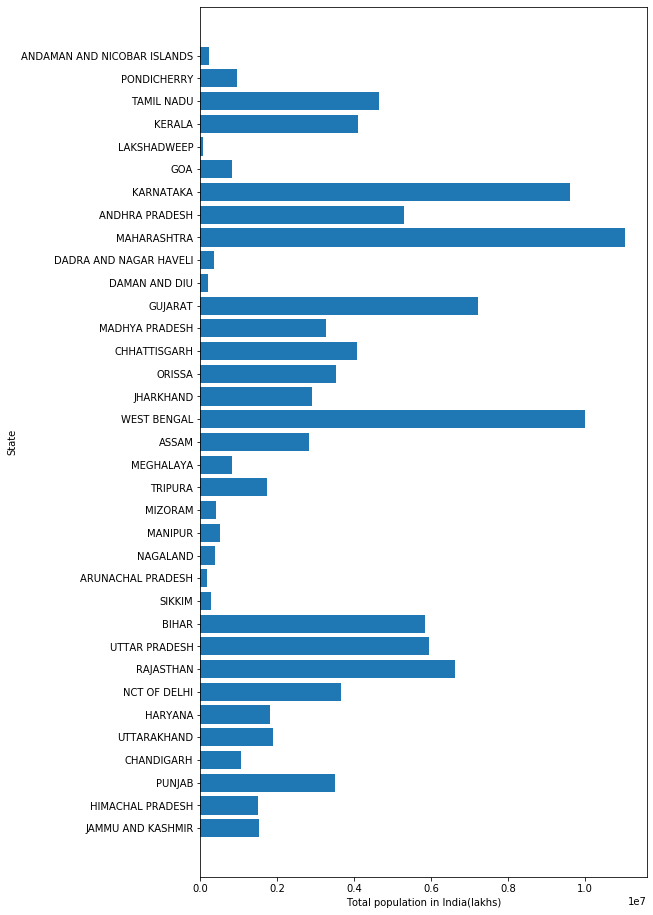

In [6]:
x = data['State name']
y = data['Population']

f , ax = plt.subplots(figsize=(8,16))

plt.barh(x,y, height=0.8)
plt.xlabel('Total population in India(lakhs)')
plt.ylabel('State')

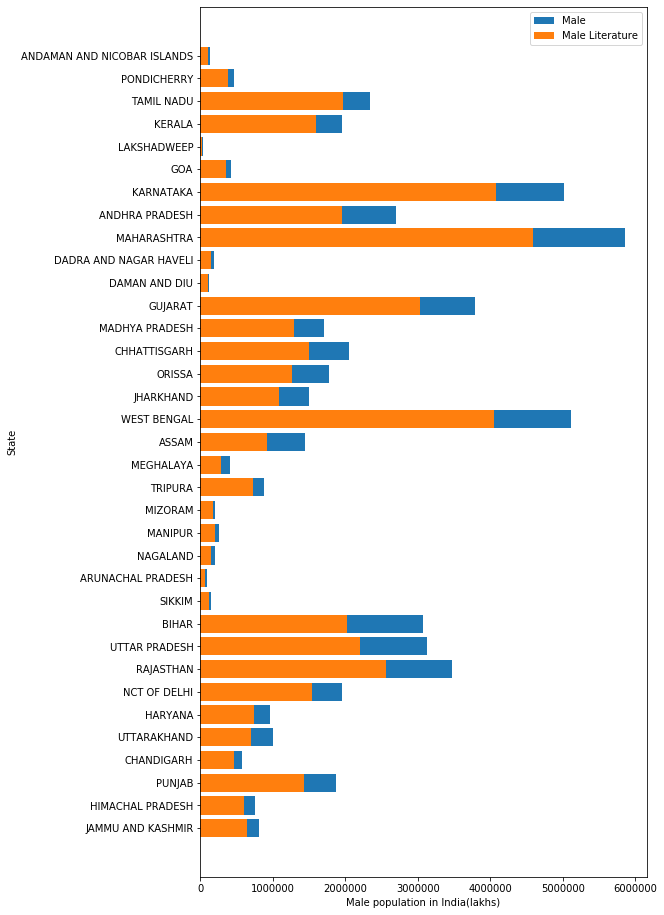

In [7]:
x = data['State name']
z = data['Male_Literate']
y = data['Male']

f , ax = plt.subplots(figsize=(8,16))

plt.barh(x,y, height=0.8, label= 'Male')
plt.barh(x,z, height=0.8, label = 'Male Literature')
plt.xlabel('Male population in India(lakhs)')
plt.ylabel('State')
plt.legend()

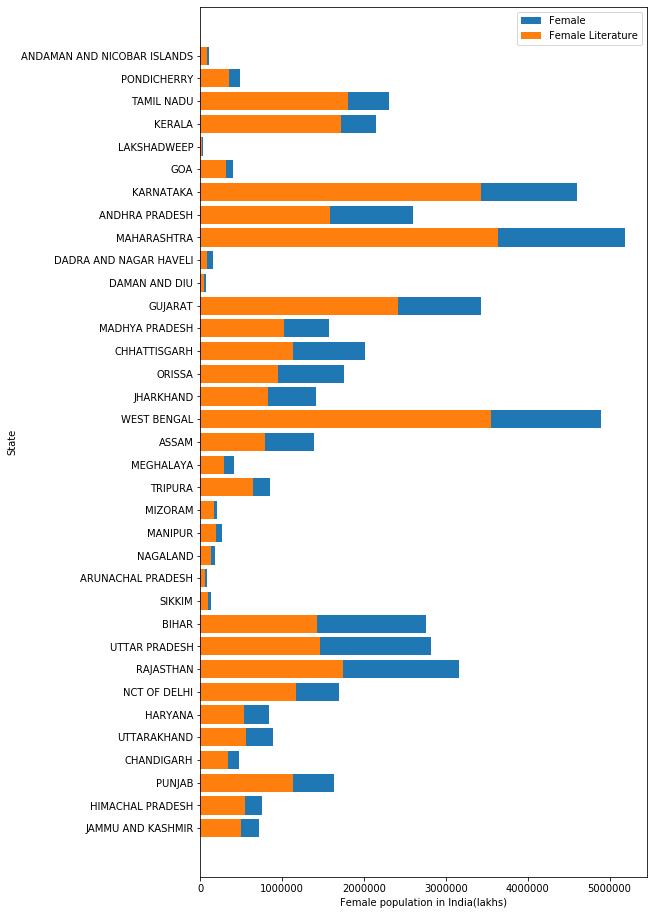

In [8]:
x = data['State name']
y = data['Female']
z = data['Female_Literate']

f , ax = plt.subplots(figsize=(8,16))

plt.barh(x,y, height=0.8, label='Female')
plt.barh(x,z, height=0.8, label="Female Literature")
plt.xlabel('Female population in India(lakhs)')
plt.ylabel('State')
plt.legend()

# SAMPLE

In [9]:
x = data['State name']
y = data['Population']

In [10]:
# summary for quantitative dataset
y.describe()

count    6.400000e+02
mean     1.891961e+06
std      1.544380e+06
min      8.004000e+03
25%      8.178610e+05
50%      1.557367e+06
75%      2.583551e+06
max      1.106015e+07
Name: Population, dtype: float64

In [11]:
y.mean()

1891960.9015625

In [12]:
y.std()

1544380.2874477569

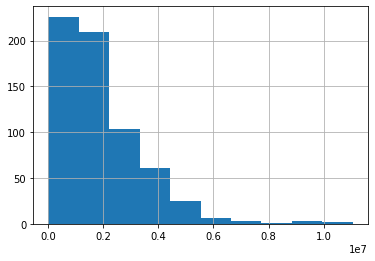

In [13]:
# Histogram

y.hist()

The distribution of the population is right skewed. The mean is 1891960.9 and Standard deviation 1544380.2

In [14]:
s1 = y.sample(n=50)

In [15]:
# summary on sample 1
s1.describe()

count    5.000000e+01
mean     2.172737e+06
std      1.988084e+06
min      2.116700e+04
25%      7.644628e+05
50%      1.785332e+06
75%      2.801917e+06
max      9.356962e+06
Name: Population, dtype: float64

In [16]:
s1.mean()

2172736.86

In [17]:
s1.std()

1988084.4784029927

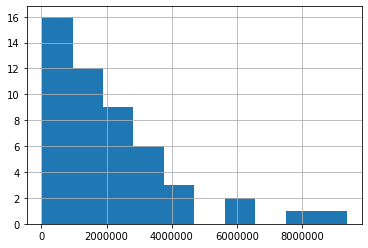

In [18]:
s1.hist()

In [19]:
# sample 2
s2 = y.sample(n=100)

In [20]:
# summary on sample 2
s2.describe()

count    1.000000e+02
mean     1.810768e+06
std      1.201434e+06
min      8.303000e+04
25%      9.534725e+05
50%      1.662286e+06
75%      2.529048e+06
max      5.519145e+06
Name: Population, dtype: float64

In [21]:
s1.mean()

2172736.86

In [22]:
s2.std()

1201434.4326799812

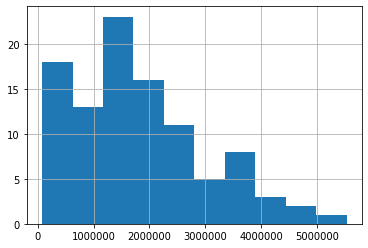

In [23]:
s2.hist()

# SAMPLE DISTRIBUTION ON QUANTITATIVE VARIABLE

In [24]:
sample_means = np.repeat(np.nan,500)
for i in range(500):
    sample = y.sample(n = 50)                # sample
    sample_means[i] = sample.mean()          # mean of each sample


(array([ 11.,  23.,  51.,  78.,  89., 106.,  65.,  49.,  20.,   8.]),
 array([1346368.44 , 1454130.314, 1561892.188, 1669654.062, 1777415.936,
        1885177.81 , 1992939.684, 2100701.558, 2208463.432, 2316225.306,
        2423987.18 ]),
 <a list of 10 Patch objects>)

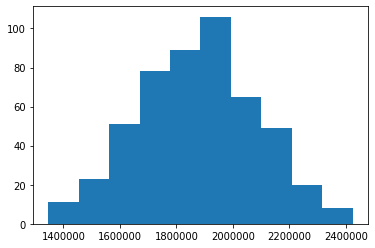

In [25]:
plt.hist(sample_means)

In [26]:
sample_means.mean()

1876079.2642800002

In [27]:
sample_means = np.repeat(np.nan,600)
for i in range(600):
    sample = y.sample(n = 50)
    sample_means[i] = sample.mean()


(array([ 10.,  31.,  88., 142., 153., 104.,  45.,  19.,   6.,   2.]),
 array([1317036.64 , 1455731.988, 1594427.336, 1733122.684, 1871818.032,
        2010513.38 , 2149208.728, 2287904.076, 2426599.424, 2565294.772,
        2703990.12 ]),
 <a list of 10 Patch objects>)

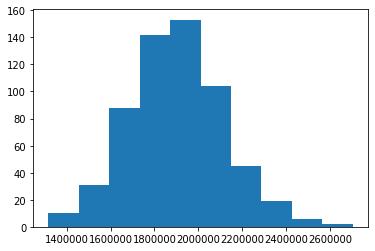

In [28]:
plt.hist(sample_means)

In [29]:
sample_means.mean()

1901671.8099666666

# Population mean and population standard deviation

In [30]:
data_sa = data['Population']

In [31]:
population_mean = data_sa.mean()
population_std = data_sa.std()

In [32]:
print("population_mean:", population_mean)
print("population standard deviation:", population_std)

population_mean: 1891960.9015625
population standard deviation: 1544380.2874477569


In [33]:
s = data_sa.sample(n=50)

In [34]:
s.describe()

count    5.000000e+01
mean     1.958100e+06
std      1.756407e+06
min      5.562600e+04
25%      7.057398e+05
50%      1.657942e+06
75%      2.565248e+06
max      1.000978e+07
Name: Population, dtype: float64

In [35]:
sample_mean = s.mean()
sample_std = s.std()

In [36]:
print("sample mean:", sample_mean)
print("sample standard deviation:", sample_std)

sample mean: 1958100.02
sample standard deviation: 1756407.3629847376


# Interval estimate for known Population Standard deviation

In [37]:
n = 100

In [38]:
z_distribution = norm.ppf(0.924)
z_distribution

1.432502720825812

In [39]:
standard_error = population_std/math.sqrt(n)
margin_error = z_distribution * standard_error

In [40]:
print("Standard error:", standard_error) 
print("Margin error:", margin_error)

Standard error: 154438.0287447757
Margin error: 221232.89637586614


In [41]:
ie1 = sample_mean + margin_error
ie2 = sample_mean - margin_error

In [42]:
(ie2,ie1)

(1736867.1236241339, 2179332.916375866)

In [43]:
population_mean

1891960.9015625

# Interval estimate for unknown Population Standard deviation

In [44]:
n = 100

In [45]:
t_distribution = t.ppf(q=0.924, df=n-1) 
t_distribution

1.443630448591297

In [46]:
standard_error = sample_std/math.sqrt(n)
margin_error = t_distribution * standard_error

In [47]:
print("Standard error:", standard_error) 
print("Margin error:", margin_error)

Standard error: 175640.73629847376
Margin error: 253560.31493347135


In [48]:
ie1 = sample_mean - margin_error
ie2 = sample_mean + margin_error

In [49]:
(ie2,ie1)

(2211660.3349334714, 1704539.7050665286)

# two tailed Hypothesis testing

In [50]:
sum_literature = sum(data['Male_Literate'])
length = len(data['Male_Literate'])

Average = sum_literature / length
Average

679318.159375

#### Hypothesis 

The average Male literate in India is 679318.15

In [51]:
from scipy.stats import ttest_1samp
samp = data['Male_Literate']
tset, pval = ttest_1samp(samp, 679318.15)

In [52]:
print("P-Values:", pval)

P-Values: 0.9999996806949139


In [53]:
if pval < 0.05:
    print ("We are rejecting null-hypothesis")
else:
    print ("We are accepting null_hypothesis")

We are accepting null_hypothesis


In [54]:
samp.mean()

679318.159375

# Bootstrap resampling

In [55]:
spl = data['Population']
sample_draw = spl.sample(n = 50)

In [56]:
n = len(sample_draw)
b = 10000

In [57]:
sample_means = np.repeat(np.nan,10000)
for i in range(10000):
    sample = y.sample(n = 40)
    sample_means[i] = sample.mean()

In [58]:
boot_mean = sample_means.mean()
boot_mean

1890811.1355974998

#  Qualitative variable

In [59]:
data1 = pd.read_csv('heart.csv')
data1.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [60]:
# summary on entire dataset

data1.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [61]:
data1.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [62]:
data1.shape

(462, 10)

# sample

In [63]:
x = Counter(data1['famhist'])
x

Counter({'Present': 192, 'Absent': 270})

In [64]:
population_proportion = x['Present'] / 462
population_proportion

0.4155844155844156

In [65]:
y = data1['chd']
sample_cal = y.sample(n=50)

In [66]:
sample_prop = Counter(sample_cal)
sample_prop

Counter({0: 39, 1: 11})

In [67]:
sample_proportion = sample_prop[1] / 50
sample_proportion

0.22

In [68]:
standard_error = math.sqrt(population_proportion * (1-population_proportion)/50)
margin_error = norm.ppf(0.924) * standard_error

In [69]:
print("Standard error:", standard_error) 
print("Margin error:", margin_error)

Standard error: 0.06969562527272072
Margin error: 0.09983917283282866


In [70]:
ie1 = sample_proportion+ margin_error
ie2 = sample_proportion - margin_error

In [71]:
ie1

0.31983917283282864

In [72]:
ie2

0.12016082716717134